In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

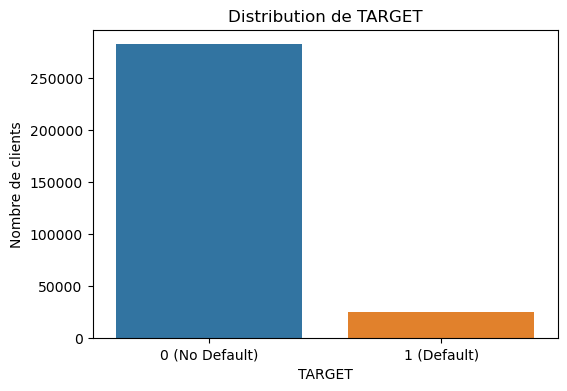

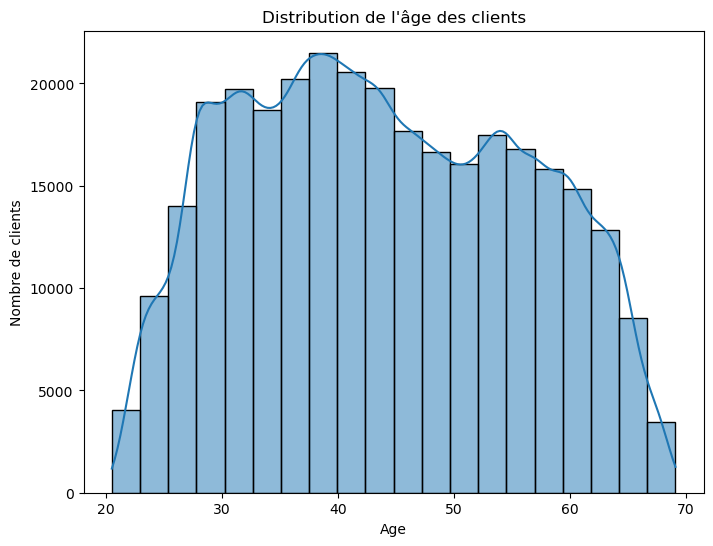

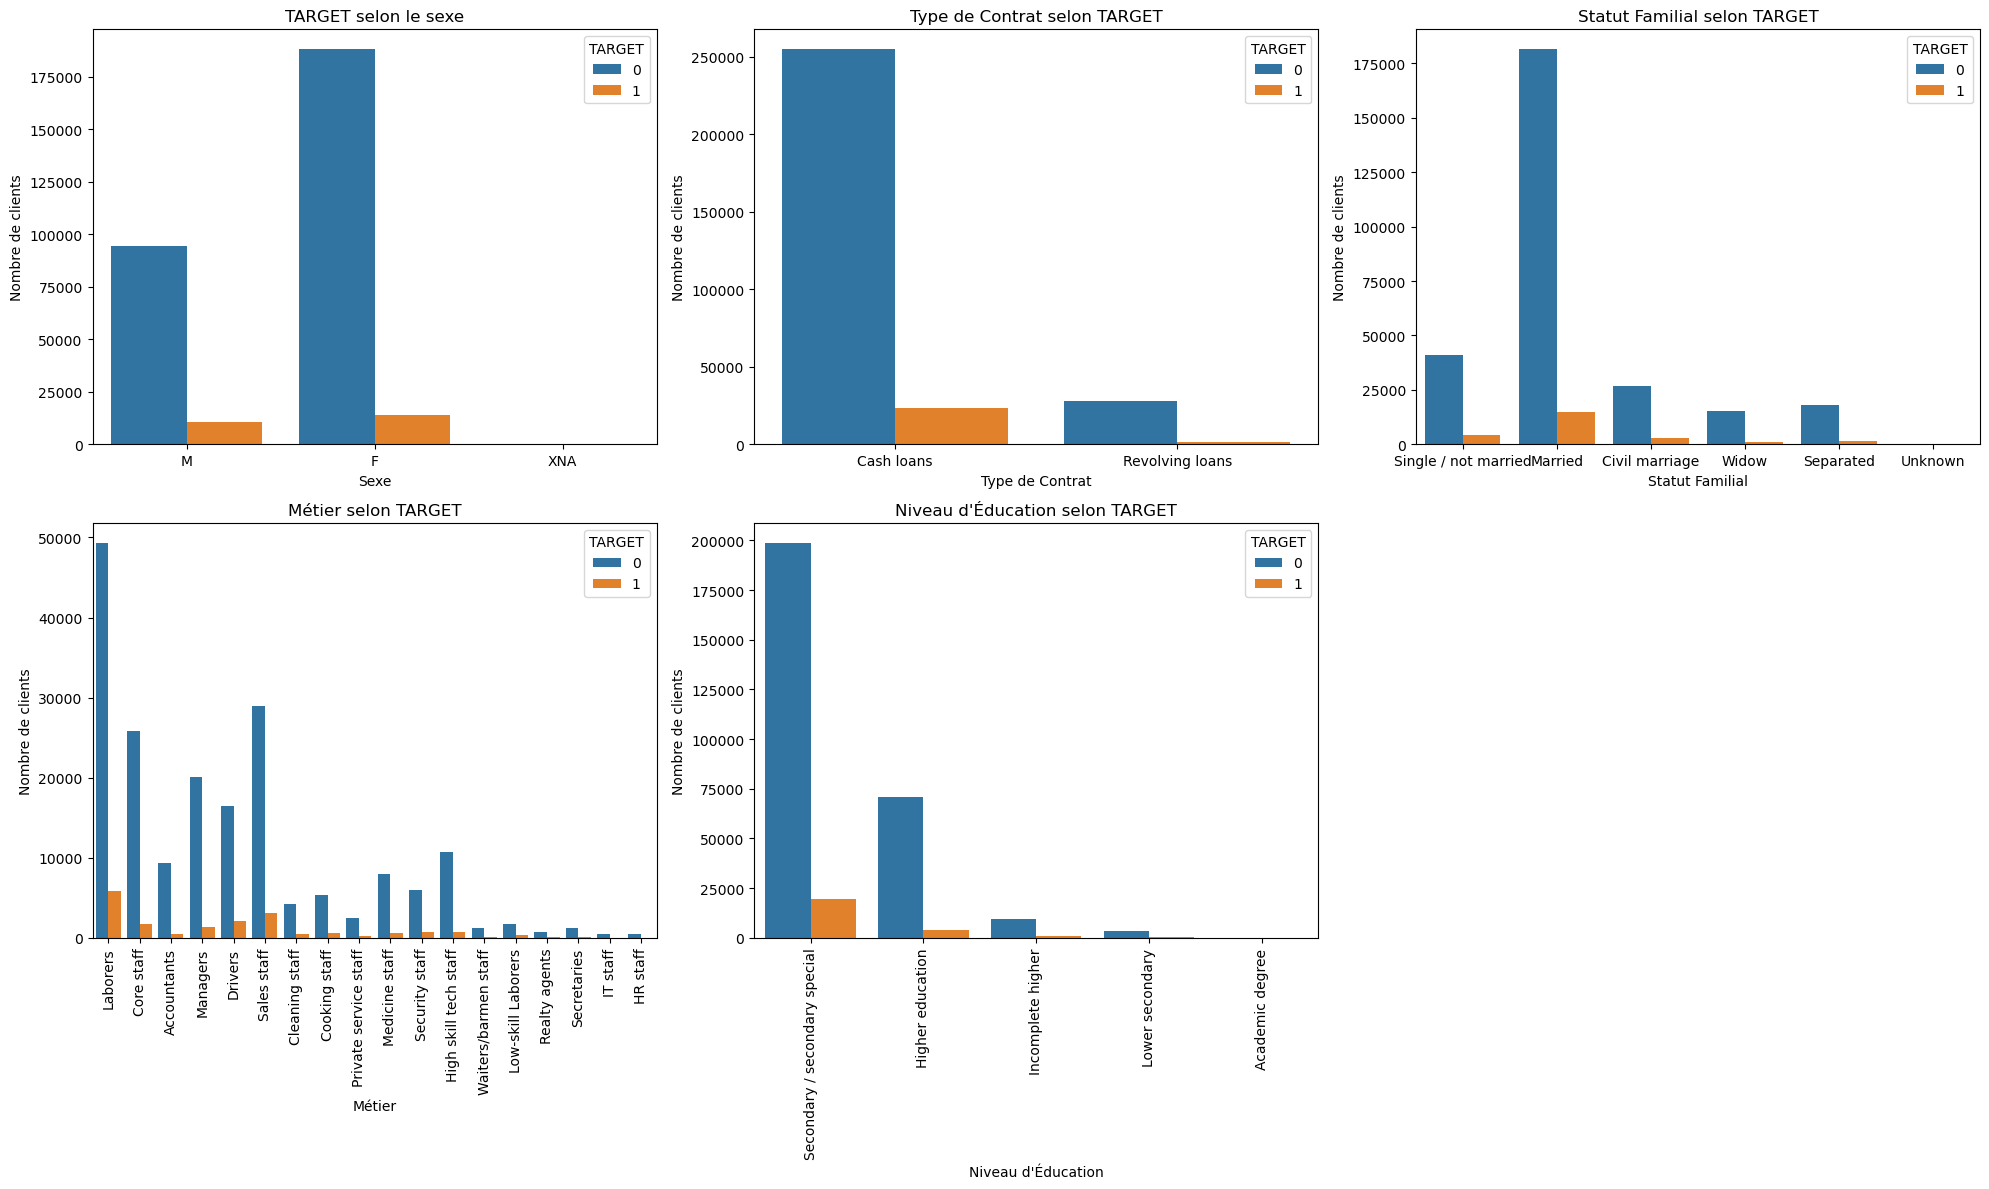

In [2]:
# Charger les données
file_path = 'C:\\Users\\Heliosaun\\Desktop\\Projet7\\application_train.csv'
data = pd.read_csv(file_path)

# Convertir les jours de naissance en âge
data['AGE'] = -data['DAYS_BIRTH'] / 365


# Analyse de la variable 'TARGET'
target_counts = data['TARGET'].value_counts()

# Création d'un graphique pour la distribution de 'TARGET'
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Distribution de TARGET')
plt.xlabel('TARGET')
plt.ylabel('Nombre de clients')
plt.xticks([0, 1], ['0 (No Default)', '1 (Default)'])
plt.show()

# Distribution des âges des clients
plt.figure(figsize=(8, 6))
sns.histplot(data['AGE'], bins=20, kde=True)
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Age')
plt.ylabel('Nombre de clients')
plt.show()

# Analyse de TARGET selon différentes variables
plt.figure(figsize=(20, 12))

# TARGET selon le sexe
plt.subplot(2, 3, 1)
sns.countplot(x='CODE_GENDER', hue='TARGET', data=data)
plt.title('TARGET selon le sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de clients')

# TARGET selon le type de contrat
plt.subplot(2, 3, 2)
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=data)
plt.title('Type de Contrat selon TARGET')
plt.xlabel('Type de Contrat')
plt.ylabel('Nombre de clients')

# TARGET selon le statut familial
plt.subplot(2, 3, 3)
sns.countplot(x='NAME_FAMILY_STATUS', hue='TARGET', data=data)
plt.title('Statut Familial selon TARGET')
plt.xlabel('Statut Familial')
plt.ylabel('Nombre de clients')

# TARGET selon le métier
plt.subplot(2, 3, 4)
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=data)
plt.xticks(rotation=90)
plt.title('Métier selon TARGET')
plt.xlabel('Métier')
plt.ylabel('Nombre de clients')

# TARGET selon le niveau d'éducation
plt.subplot(2, 3, 5)
sns.countplot(x='NAME_EDUCATION_TYPE', hue='TARGET', data=data)
plt.xticks(rotation=90)
plt.title('Niveau d\'Éducation selon TARGET')
plt.xlabel('Niveau d\'Éducation')
plt.ylabel('Nombre de clients')

plt.tight_layout()
plt.show()

In [3]:
# Calculer le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()

# Trier les colonnes par le nombre de valeurs manquantes en ordre décroissant
missing_values_sorted = missing_values.sort_values(ascending=False)

# Sélectionner les 20 colonnes avec le plus de valeurs manquantes
top_20_missing_values = missing_values_sorted.head(20)
print(top_20_missing_values)

COMMONAREA_MEDI             214865
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
FLOORSMIN_MEDI              208642
FLOORSMIN_MODE              208642
FLOORSMIN_AVG               208642
YEARS_BUILD_AVG             204488
YEARS_BUILD_MEDI            204488
YEARS_BUILD_MODE            204488
OWN_CAR_AGE                 202929
LANDAREA_MODE               182590
LANDAREA_AVG                182590
LANDAREA_MEDI               182590
dtype: int64


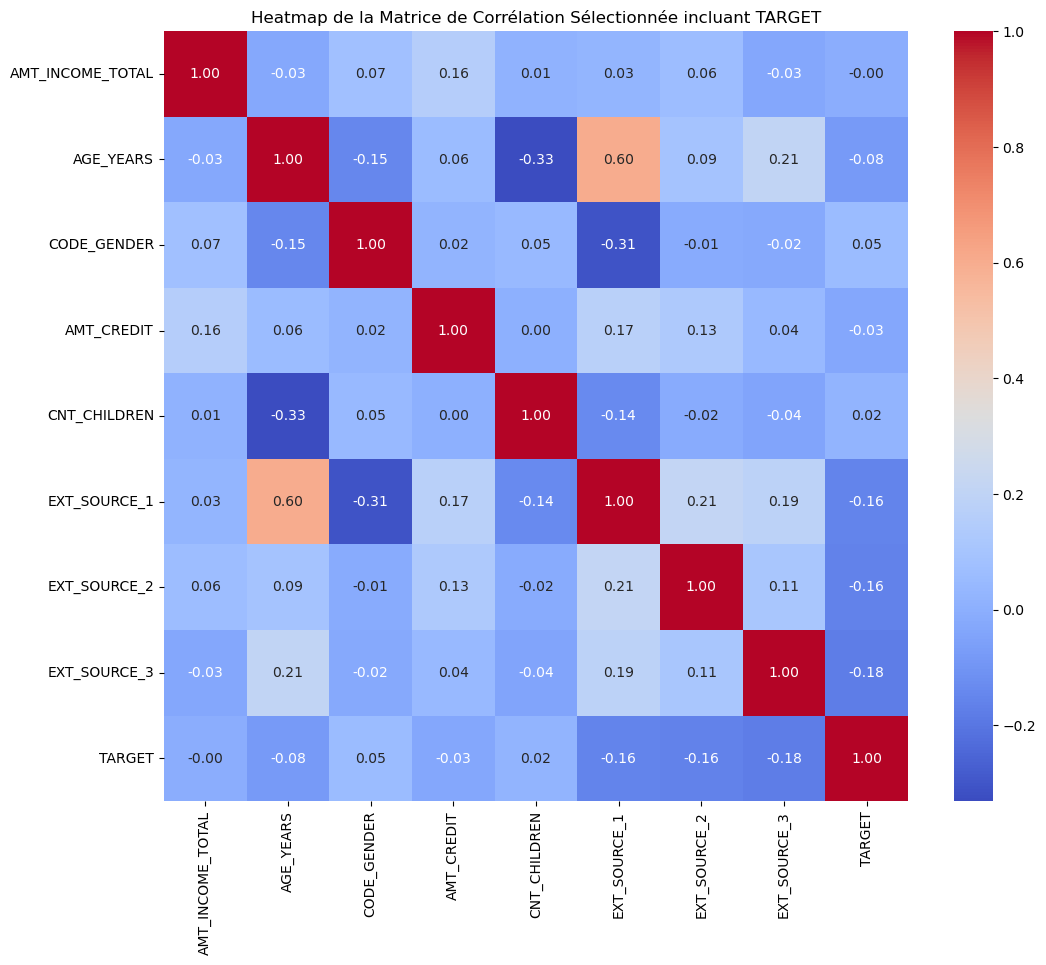

In [4]:
# Ajouter les colonnes nécessaires pour l'analyse de corrélation
selected_columns = ['AMT_INCOME_TOTAL', 'AGE_YEARS', 'CODE_GENDER', 'AMT_CREDIT', 'CNT_CHILDREN']
ext_source_columns = [col for col in data.columns if 'EXT_SOURCE' in col]
selected_columns_with_target = selected_columns + ext_source_columns + ['TARGET']

# Convertir DAYS_BIRTH en années et le rendre positif
data['AGE_YEARS'] = abs(data['DAYS_BIRTH']) / 365

# Convertir 'CODE_GENDER' en valeurs numériques
data['CODE_GENDER'] = data['CODE_GENDER'].map({'M': 1, 'F': 0})

# Créer un nouveau dataframe avec les colonnes sélectionnées
selected_data_with_target = data[selected_columns_with_target]

# Calculer la matrice de corrélation
selected_corr_matrix_with_target = selected_data_with_target.corr()

# Générer la heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de la Matrice de Corrélation Sélectionnée incluant TARGET')
plt.show()